Descriptive Statistics:
         year     moy_date     doy_date     dow_date         hour  \
count  8760.0  8760.000000  8760.000000  8760.000000  8760.000000   
mean   2017.0     6.526027   183.000000     3.991781    11.500000   
std       0.0     3.448048   105.372043     2.003519     6.922582   
min    2017.0     1.000000     1.000000     1.000000     0.000000   
25%    2017.0     4.000000    92.000000     2.000000     5.750000   
50%    2017.0     7.000000   183.000000     4.000000    11.500000   
75%    2017.0    10.000000   274.000000     6.000000    17.250000   
max    2017.0    12.000000   365.000000     7.000000    23.000000   

              temp        humid           r1           r2           r3  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     28.658419    66.912808     0.224942     0.228293     0.239121   
std       2.851937    18.325252     0.139805     0.196766     0.213277   
min      17.500000    14.160000     0.010500     0.004400 

C:\Users\rajya\AppData\Local\Temp\ipykernel_13828\109679612.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.select_dtypes(include='number').resample('H').mean()


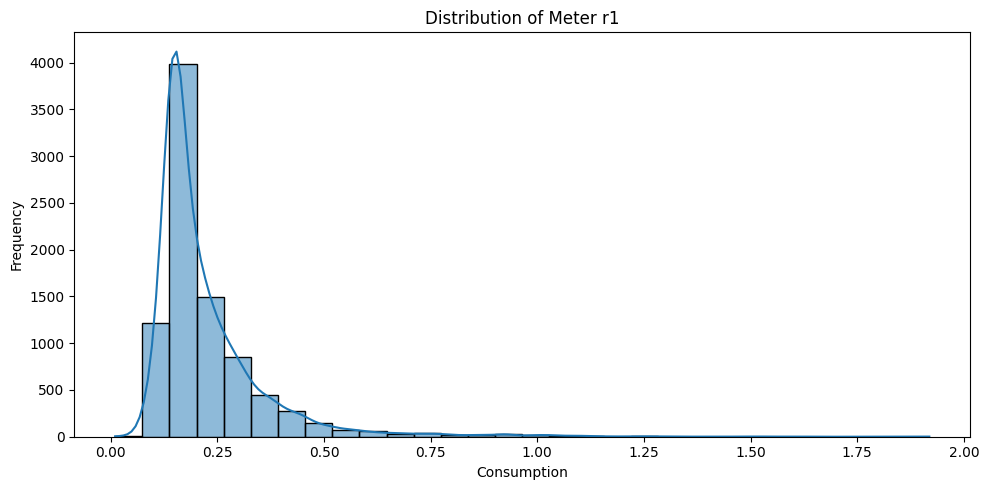

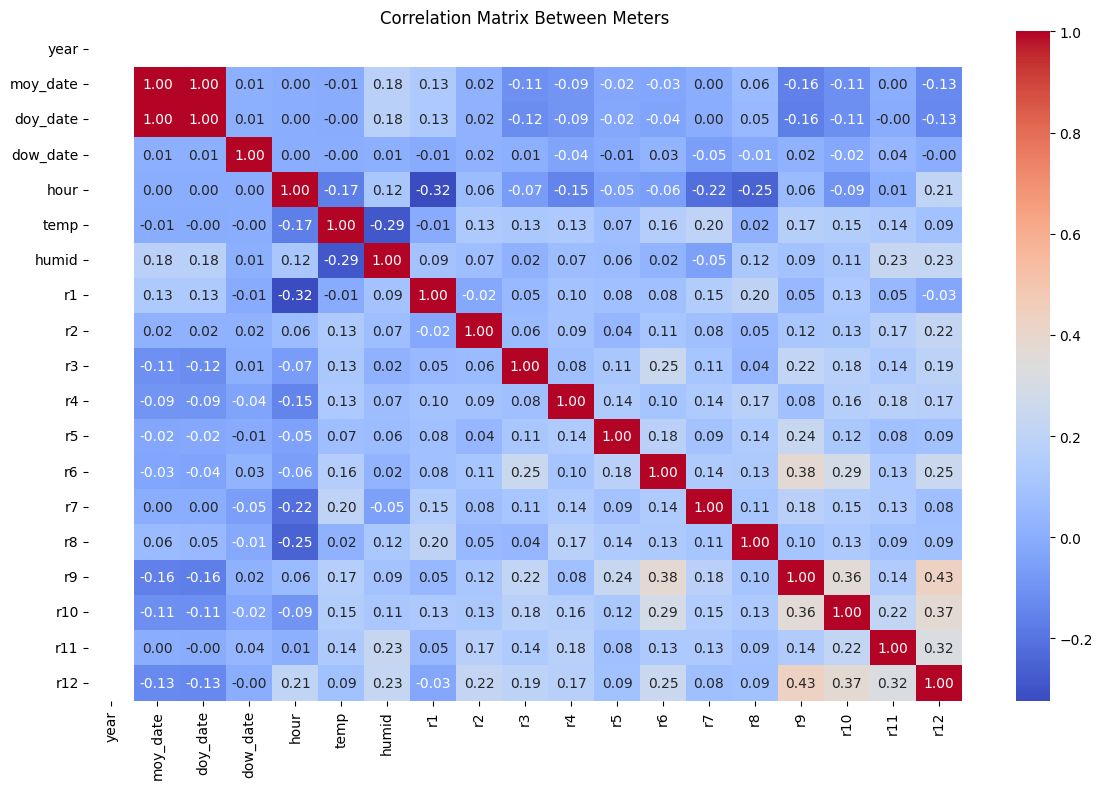

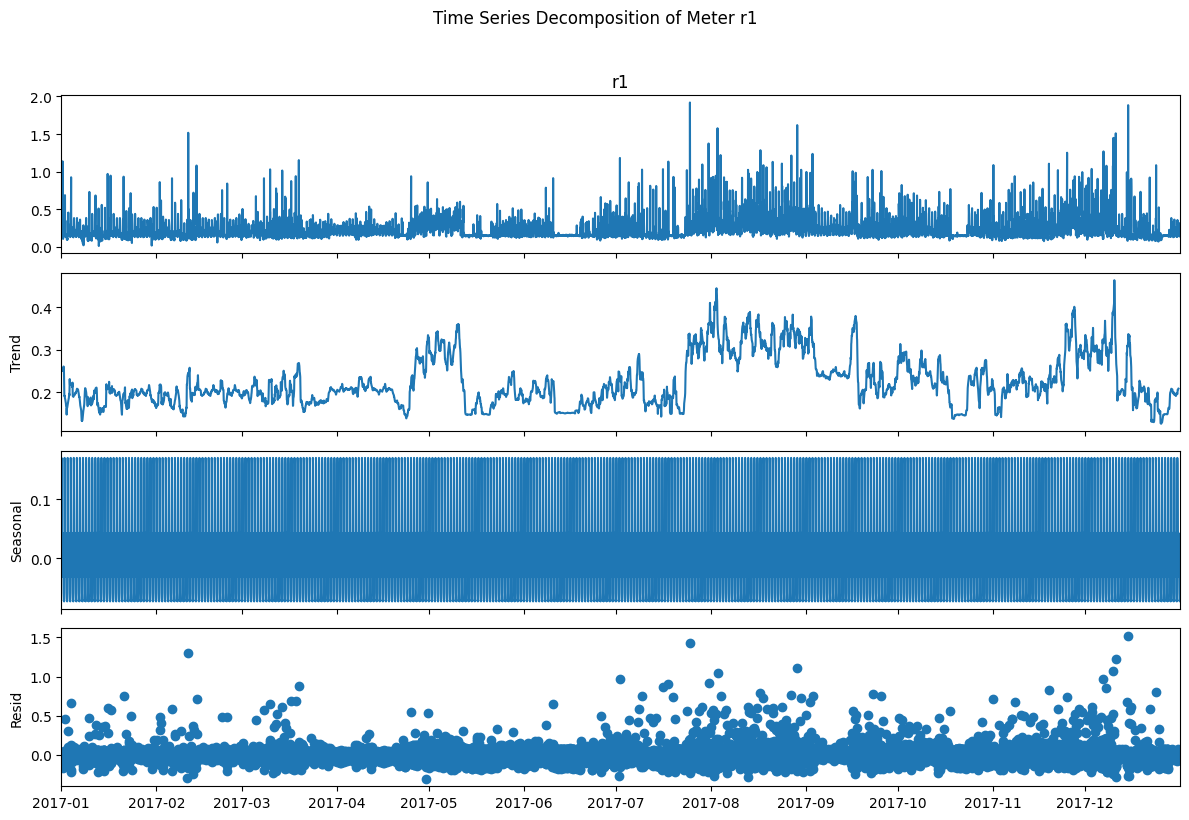

Anomalies in r1:
                       year  moy_date  doy_date  dow_date  hour  temp   humid  \
Time                                                                            
2017-01-01 10:00:00  2017.0       1.0       1.0       1.0  10.0  30.0  39.025   
2017-01-02 05:00:00  2017.0       1.0       2.0       2.0   5.0  28.5  36.155   
2017-01-04 05:00:00  2017.0       1.0       4.0       4.0   5.0  27.5  32.380   
2017-01-10 04:00:00  2017.0       1.0      10.0       3.0   4.0  23.5  39.655   
2017-01-12 04:00:00  2017.0       1.0      12.0       5.0   4.0  22.5  36.775   
...                     ...       ...       ...       ...   ...   ...     ...   
2017-12-16 02:00:00  2017.0      12.0     350.0       7.0   2.0  24.0  75.975   
2017-12-17 03:00:00  2017.0      12.0     351.0       1.0   3.0  27.5  48.010   
2017-12-19 02:00:00  2017.0      12.0     353.0       3.0   2.0  26.0  43.105   
2017-12-22 02:00:00  2017.0      12.0     356.0       6.0   2.0  25.0  41.420   
2017-12-24 

C:\Users\rajya\AppData\Local\Temp\ipykernel_13828\109679612.py:62: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(hourly_df.dropna())


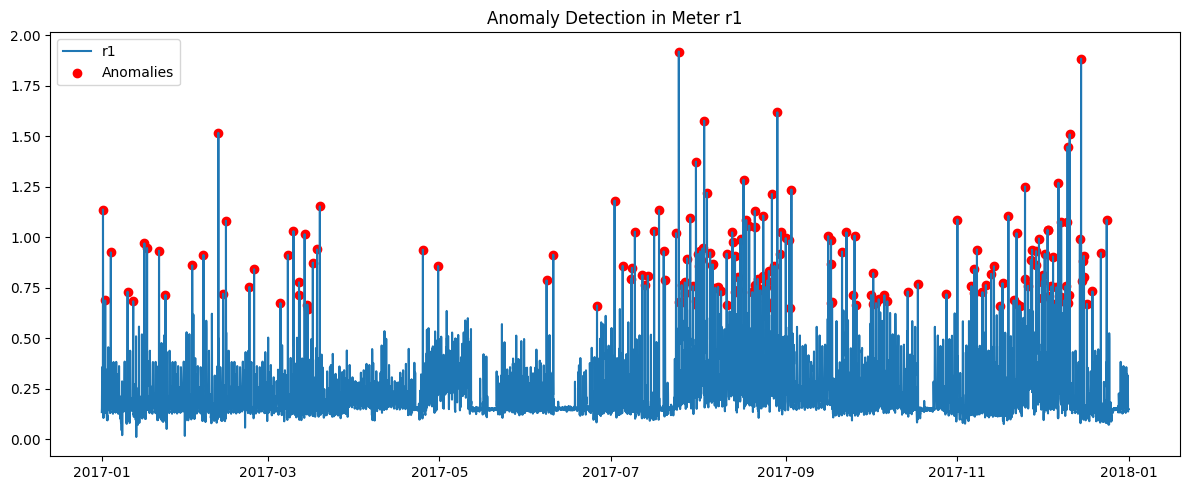

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_excel("data_all_res copy.xlsx")  


df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

hourly_df = df.select_dtypes(include='number').resample('H').mean()



desc_stats = hourly_df.describe()
print("Descriptive Statistics:")
print(desc_stats)


plt.figure(figsize=(10, 5))
sns.histplot(hourly_df['r1'].dropna(), kde=True, bins=30)
plt.title("Distribution of Meter r1")
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(hourly_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Meters")
plt.tight_layout()
plt.show()

decomposition = seasonal_decompose(hourly_df['r1'].dropna(), model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Time Series Decomposition of Meter r1", y=1.02)
plt.tight_layout()
plt.show()


z_scores = zscore(hourly_df.dropna())
anomalies = pd.DataFrame(np.abs(z_scores) > 3, columns=hourly_df.columns, index=hourly_df.dropna().index)


print("Anomalies in r1:")
print(hourly_df[anomalies['r1']])


plt.figure(figsize=(12, 5))
plt.plot(hourly_df['r1'], label='r1')
plt.scatter(hourly_df[anomalies['r1']].index, hourly_df[anomalies['r1']]['r1'], color='red', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection in Meter r1")
plt.tight_layout()
plt.show()


Descriptive Statistics:
         year     moy_date     doy_date     dow_date         hour  \
count  8760.0  8760.000000  8760.000000  8760.000000  8760.000000   
mean   2017.0     6.526027   183.000000     3.991781    11.500000   
std       0.0     3.448048   105.372043     2.003519     6.922582   
min    2017.0     1.000000     1.000000     1.000000     0.000000   
25%    2017.0     4.000000    92.000000     2.000000     5.750000   
50%    2017.0     7.000000   183.000000     4.000000    11.500000   
75%    2017.0    10.000000   274.000000     6.000000    17.250000   
max    2017.0    12.000000   365.000000     7.000000    23.000000   

              temp        humid           r1           r2           r3  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     28.658419    66.912808     0.224942     0.228293     0.239121   
std       2.851937    18.325252     0.139805     0.196766     0.213277   
min      17.500000    14.160000     0.010500     0.004400 

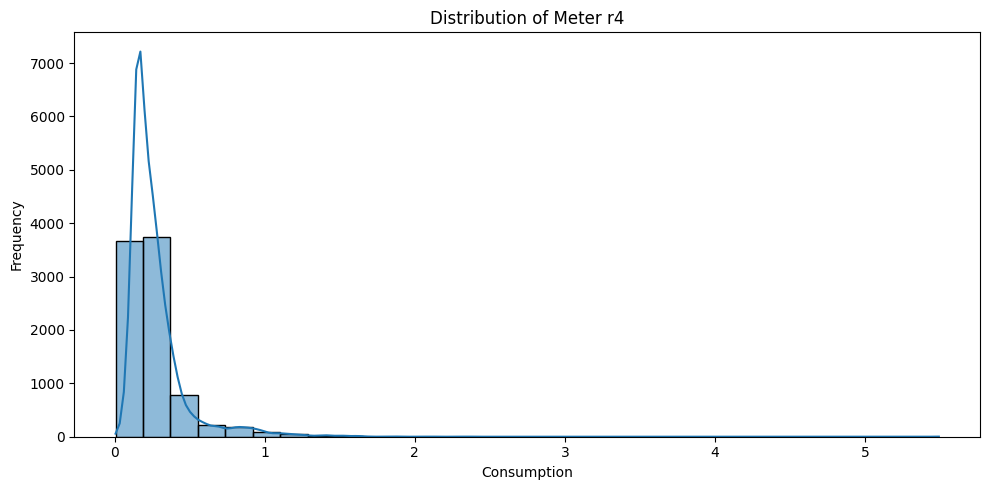

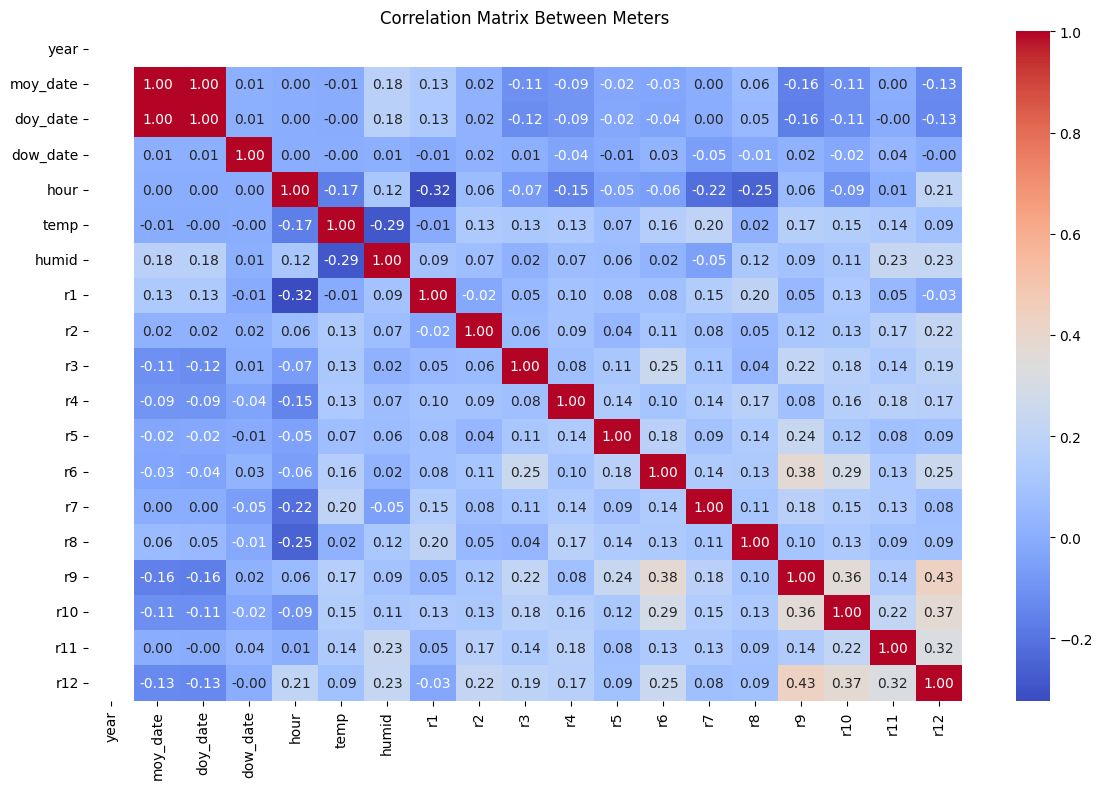

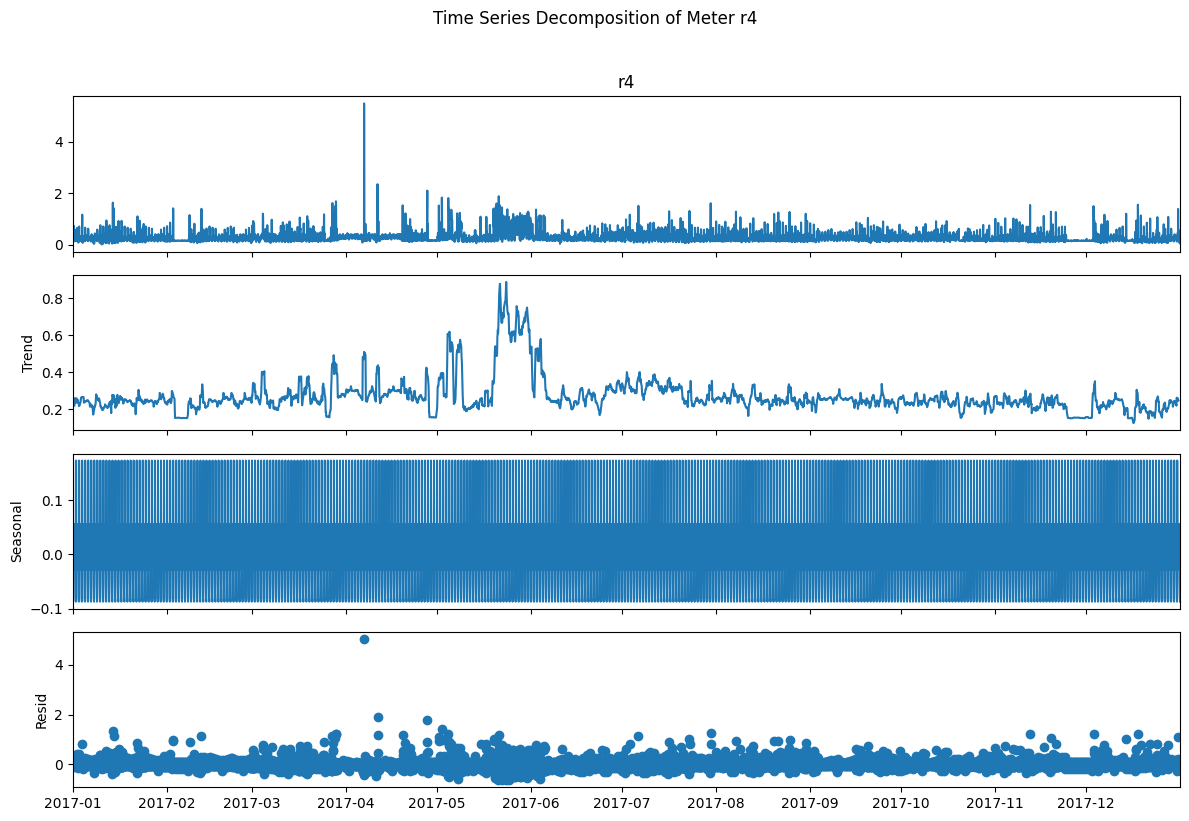

Anomalies in r4:
                       year  moy_date  doy_date  dow_date  hour  temp   humid  \
Time                                                                            
2017-01-04 02:00:00  2017.0       1.0       4.0       4.0   2.0  22.5  43.640   
2017-01-12 01:00:00  2017.0       1.0      12.0       5.0   1.0  19.0  55.995   
2017-01-14 04:00:00  2017.0       1.0      14.0       7.0   4.0  25.5  42.970   
2017-01-14 11:00:00  2017.0       1.0      14.0       7.0  11.0  28.5  48.185   
2017-01-16 01:00:00  2017.0       1.0      16.0       2.0   1.0  23.0  73.440   
...                     ...       ...       ...       ...   ...   ...     ...   
2017-12-19 01:00:00  2017.0      12.0     353.0       3.0   1.0  25.0  47.250   
2017-12-22 03:00:00  2017.0      12.0     356.0       6.0   3.0  25.0  41.420   
2017-12-24 12:00:00  2017.0      12.0     358.0       1.0  12.0  28.5  51.340   
2017-12-28 02:00:00  2017.0      12.0     362.0       5.0   2.0  23.0  53.290   
2017-12-31 

C:\Users\rajya\AppData\Local\Temp\ipykernel_13828\534134882.py:29: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(hourly_df.dropna())


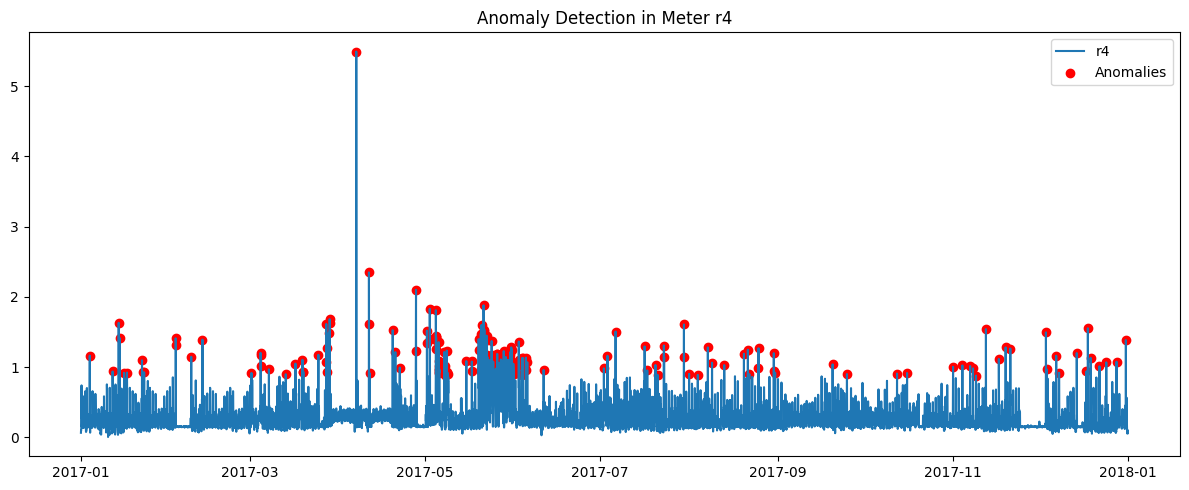

In [5]:

desc_stats = hourly_df.describe()
print("Descriptive Statistics:")
print(desc_stats)


plt.figure(figsize=(10, 5))
sns.histplot(hourly_df['r4'].dropna(), kde=True, bins=30)
plt.title("Distribution of Meter r4")
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(hourly_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Meters")
plt.tight_layout()
plt.show()

decomposition = seasonal_decompose(hourly_df['r4'].dropna(), model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Time Series Decomposition of Meter r4", y=1.02)
plt.tight_layout()
plt.show()


z_scores = zscore(hourly_df.dropna())
anomalies = pd.DataFrame(np.abs(z_scores) > 3, columns=hourly_df.columns, index=hourly_df.dropna().index)


print("Anomalies in r4:")
print(hourly_df[anomalies['r4']])


plt.figure(figsize=(12, 5))
plt.plot(hourly_df['r4'], label='r4')
plt.scatter(hourly_df[anomalies['r4']].index, hourly_df[anomalies['r4']]['r4'], color='red', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection in Meter r4")
plt.tight_layout()
plt.show()
